In [1]:
import pandas as pd
import os

In [2]:
all_data= pd.read_csv('all_data.csv')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Cleaning Data

In [3]:
all_data = all_data.dropna(how='all')

In [4]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]

In [6]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [9]:
all_data.iloc[:, [2, 3, 7, 6]]

,Quantity Ordered,Price Each,Sales,Month
0,2,11.95,23.90,04
2,1,99.99,99.99,04
3,1,600.00,600.00,04
4,1,11.99,11.99,04
5,1,11.99,11.99,04
...,...,...,...,...
186845,3,2.99,8.97,09
186846,1,700.00,700.00,09
186847,1,700.00,700.00,09
186848,1,379.99,379.99,09


In [10]:
g = all_data.groupby('Month').sum()
g

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


In [11]:
import matplotlib.pyplot as plt

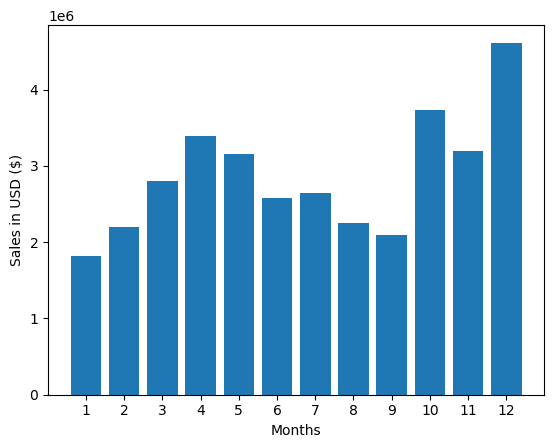

In [19]:
months = range(1, 13)

plt.bar(months, g['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

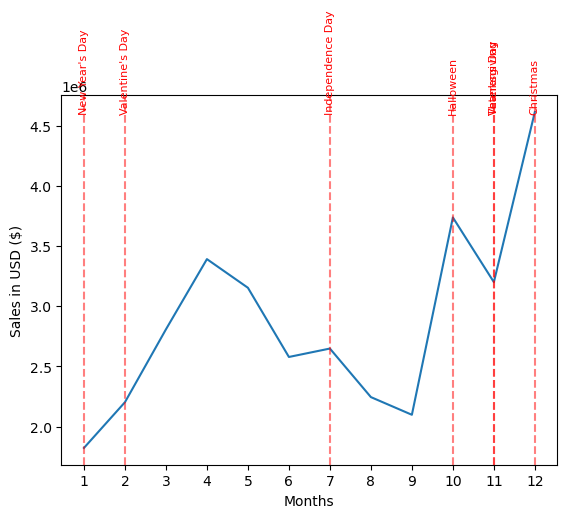

In [30]:
import matplotlib.pyplot as plt
from dateutil import parser, relativedelta
import datetime

months = list(range(1, 13))
holiday_list = [
    ("December 25th", "Christmas"),
    ("February 14th", "Valentine's Day"),
    ("October 31st", "Halloween"),
    ("Fourth Thursday in November", "Thanksgiving"),
    ("January 1st", "New Year's Day"),
    ("July 4th", "Independence Day"),
    ("Last Monday in May", "Memorial Day"),
    ("First Monday in September", "Labor Day"),
    ("Third Monday in January", "Martin Luther King Jr. Day"),
    ("November 11th", "Veterans Day")
]

# Plotting sales data
plt.plot(months, g['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')

# Add vertical lines for holiday dates
for holiday in holiday_list:
    holiday_date = holiday[0]
    holiday_name = holiday[1]
    
    try:
        parsed_date = parser.parse(holiday_date)
    except ValueError:
        if "Fourth" in holiday_date and "Thursday" in holiday_date and "November" in holiday_date:
            # Calculate the date for "Fourth Thursday in November"
            year = datetime.datetime.now().year
            parsed_date = datetime.datetime(year, 11, 1)
            while parsed_date.weekday() != 3:  # Thursday is represented by 3
                parsed_date += relativedelta.relativedelta(days=1)
            parsed_date += relativedelta.relativedelta(weeks=3)
        else:
            continue
    
    month_index = parsed_date.month
    plt.axvline(x=month_index, color='red', linestyle='--', alpha=0.5)
    plt.text(month_index, max(g['Sales']), holiday_name, color='red', ha='center', rotation='vertical', size=8)

plt.show()


# what city has the highest number of sales

In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [14]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


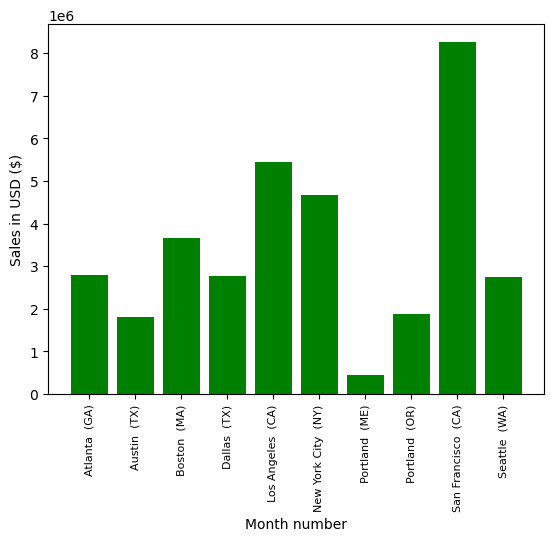

In [15]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'], color='green')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

## what time should we display the ads to maximize the likelihood of customer's buying product?

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


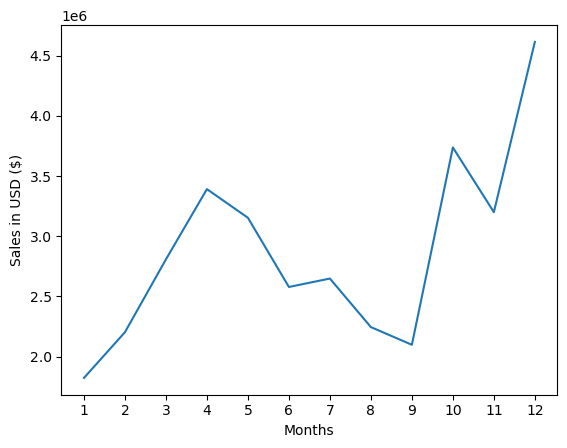

In [32]:
months = range(1, 13)

plt.plot(months, g['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

## Top 5 best selling months

In [35]:
g['Sales'].nlargest(5)

Month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
Name: Sales, dtype: float64

In [40]:
all_data['Order Date'].head(1)

0    04/19/19 08:46
Name: Order Date, dtype: object

In [44]:
all_data['Hour'] = all_data['Order Date'].str[9:11]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),09


In [46]:
g3 = all_data.groupby('Hour').sum()
g3

,Quantity Ordered,Price Each,Sales
Hour,,,
00,4428,709296.70,713721.27
01,2619,458490.00,460866.88
02,1398,233833.64,234851.44
03,928,144726.42,145757.89
04,937,162058.18,162661.01
05,1493,229621.21,230679.82
06,2810,445000.11,448113.00
07,4556,740568.11,744854.12
08,7002,1185970.62,1192348.97


In [61]:
g3.sort_values('Sales')

,Quantity Ordered,Price Each,Sales
Hour,,,
03,928,144726.42,145757.89
04,937,162058.18,162661.01
05,1493,229621.21,230679.82
02,1398,233833.64,234851.44
06,2810,445000.11,448113.00
01,2619,458490.00,460866.88
00,4428,709296.70,713721.27
07,4556,740568.11,744854.12
23,7065,1172625.87,1179304.44


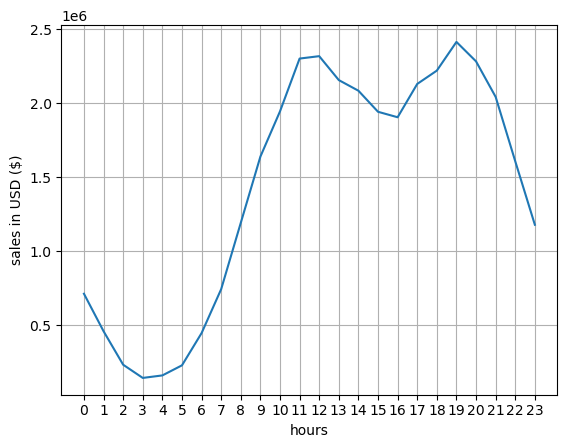

In [63]:
hours = range(0, 24)

plt.plot(hours, g3['Sales'])
plt.xlabel('hours')
plt.ylabel('sales in USD ($)')
plt.xticks(hours)
plt.grid()
plt.show()

In [74]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),08
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),09


## what products are often sold together

In [72]:
all_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [83]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Prepare the data
product_groups = all_data.groupby('Order ID')['Product'].apply(list).values.tolist()

In [84]:
# Encode the data
te = TransactionEncoder()
te_ary = te.fit_transform(product_groups)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [91]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

In [92]:

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [93]:
# Sort the rules by confidence in descending order
rules = rules.sort_values(by='confidence', ascending=False)

In [94]:
# Print the top 5 rules
print(rules)

                  antecedents                 consequents  antecedent support  \
1              (Google Phone)      (USB-C Charging Cable)            0.030946   
5           (Vareebadd Phone)      (USB-C Charging Cable)            0.011573   
2                    (iPhone)  (Lightning Charging Cable)            0.038333   
3  (Lightning Charging Cable)                    (iPhone)            0.121074   
0      (USB-C Charging Cable)              (Google Phone)            0.122480   
4      (USB-C Charging Cable)           (Vareebadd Phone)            0.122480   

   consequent support   support  confidence      lift  leverage  conviction  \
1            0.122480  0.005587    0.180551  1.474120  0.001797    1.070865   
5            0.122480  0.002062    0.178208  1.454996  0.000645    1.067813   
2            0.121074  0.005666    0.147807  1.220804  0.001025    1.031370   
3            0.038333  0.005666    0.046797  1.220804  0.001025    1.008880   
0            0.030946  0.005587    0.

In [95]:
from itertools import combinations
from collections import Counter

# Create a list of product combinations for each order
product_combinations = []
for _, order_products in all_data.groupby('Order ID')['Product']:
    product_combinations.extend(combinations(order_products, 2))

# Count the occurrences of each product combination
product_counts = Counter(product_combinations)

# Print the top 5 product combinations and their occurrence counts
top_combinations = product_counts.most_common(5)
for combination, count in top_combinations:
    print(combination, count)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
